**Series**

In [ ]:
 import pandas as pd
my_series = pd.Series([5, 6, 7, 8, 9, 10]) 
my_series

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64

In [ ]:
my_series.index

RangeIndex(start=0, stop=6, step=1)

In [ ]:
my_series.values 

array([ 5,  6,  7,  8,  9, 10])

In [ ]:
my_series[4]

9

In [ ]:
my_series2 = pd.Series([5, 6, 7, 8, 9, 10], index=['a', 'b', 'c', 'd', 'e', 'f'])
my_series2['f']

10

In [ ]:
my_series2[['a', 'b', 'f']]

a     5
b     6
f    10
dtype: int64

In [ ]:
my_series2[['a', 'b', 'f']] = 0

In [ ]:
my_series2

a    0
b    0
c    7
d    8
e    9
f    0
dtype: int64

In [ ]:
my_series2[my_series2 > 0]

c    7
d    8
e    9
dtype: int64

In [ ]:
my_series2[my_series2 > 0] * 2

c    14
d    16
e    18
dtype: int64

In [ ]:
my_series3 = pd.Series({'a': 5, 'b': 6, 'c': 7, 'd': 8})
my_series3
'd' in my_series3

True

In [ ]:
my_series3.name = 'numbers'
my_series3.index.name = 'letters'
my_series3


letters
a    5
b    6
c    7
d    8
Name: numbers, dtype: int64

In [ ]:
my_series3.index = ['A', 'B', 'C', 'D']
my_series3

A    5
B    6
C    7
D    8
Name: numbers, dtype: int64

**DataFrame**

In [ ]:
df = pd.DataFrame({
 'country': ['Belgium', 'France', 'Belarus', 'Ukraine'],
 'population': [17.04, 143.5, 9.5, 45.5],
 'square': [2724902, 17125191, 207600, 603628]
 })

In [ ]:
df


,country,population,square
0,Belgium,17.04,2724902
1,France,143.50,17125191
2,Belarus,9.50,207600
3,Ukraine,45.50,603628


In [ ]:
df['country']

0    Belgium
1     France
2    Belarus
3    Ukraine
Name: country, dtype: object

In [ ]:
type(df['country'])

pandas.core.series.Series

In [ ]:
df.columns

Index(['country', 'population', 'square'], dtype='object')

In [ ]:
 df.index

RangeIndex(start=0, stop=4, step=1)

**Доступ по индексу в DataFrame**

In [ ]:
 df = pd.DataFrame({
'country': ['Belgium', 'France', 'Belarus', 'Ukraine'],
'population': [17.04, 143.5, 9.5, 45.5],
'square': [2724902, 17125191, 207600, 603628]
 }, index=['BE', 'FR', 'BY', 'UA'])
 df


SyntaxError: ignored

In [ ]:
df.index = ['BE', 'FR', 'BY', 'UA']
df.index.name = 'Country Code'
df

,country,population,square
Country Code,,,
BE,Belgium,17.04,2724902
FR,France,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [ ]:
df['country']
df.loc['BE']

country       Belgium
population      17.04
square        2724902
Name: BE, dtype: object

In [ ]:
df.iloc[0]

country       Belgium
population      17.04
square        2724902
Name: BE, dtype: object

In [ ]:
df.loc[['BE', 'FR'], 'population']

Country Code
BE     17.04
FR    143.50
Name: population, dtype: float64

In [ ]:
df.loc['BE':'BY', :]

,country,population,square
Country Code,,,
BE,Belgium,17.04,2724902
FR,France,143.50,17125191
BY,Belarus,9.50,207600


In [ ]:
 df[df.population > 10][['country', 'square']]

,country,square
Country Code,,
BE,Belgium,2724902
FR,France,17125191
UA,Ukraine,603628


In [ ]:
df.reset_index()

,Country Code,country,population,square
0,BE,Belgium,17.04,2724902
1,FR,France,143.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


In [ ]:
df['density'] = df['population'] / df['square'] * 1000000

In [ ]:
df

,country,population,square,density
Country Code,,,,
BE,Belgium,17.04,2724902,6.253436
FR,France,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


In [ ]:
df.drop(['density'], axis='columns')

,country,population,square
Country Code,,,
BE,Belgium,17.04,2724902
FR,France,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [ ]:
df = df.rename(columns={'Country Code': 'country_code'})
df

,country,population,square,density
Country Code,,,,
BE,Belgium,17.04,2724902,6.253436
FR,France,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


**Чтение и запись данных**

In [ ]:
df.to_csv('filename.csv')

In [ ]:
df = pd.read_csv('filename.csv', sep=',')

**Группировка и агрегирование в pandas**

In [ ]:
titanic_df = pd.read_csv('titanic_train.csv')

In [ ]:
print(titanic_df.head())

   Unnamed: 0  row.names pclass  survived  ... room  ticket   boat     sex
0         998        999    3rd         1  ...  NaN     NaN    NaN  female
1         179        180    1st         0  ...  NaN     NaN  (249)    male
2         556        557    2nd         0  ...  NaN     NaN    NaN    male
3         174        175    1st         0  ...  NaN     NaN  (292)    male
4        1232       1233    3rd         0  ...  NaN     NaN    NaN    male

[5 rows x 12 columns]


In [ ]:
print(titanic_df.groupby(['sex', 'survived'])['row.names'].count())

sex     survived
female  0           107
        1           204
male    0           497
        1           111
Name: row.names, dtype: int64


In [ ]:
print(titanic_df.groupby(['pclass', 'survived'])['row.names'].count())

pclass  survived
1st     0            96
        1           132
2nd     0           111
        1            86
3rd     0           397
        1            97
Name: row.names, dtype: int64


**Сводные таблицы в pandas**

In [ ]:
pvt = titanic_df.pivot_table(index=['sex'], columns=['pclass'], values='name',
aggfunc='count')

**Сквозной пример**

In [ ]:
from pandas import read_csv, DataFrame, Series

In [ ]:
data = read_csv('titanic_dataset.csv') 

Создаем сводную таблицу на основе csv файла

In [ ]:
data

,PassangerId,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Unnamed: 10,Unnamed: 11
0,1133,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,NaN,NaN
1,1036,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,NaN,NaN
2,1074,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.55,NaN,NaN
3,128,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.55,NaN,NaN
4,326,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.55,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,737,0,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,NaN
1305,80,0,3,"Zabour, Miss. Thamine",female,0.0000,1,0,2665,14.4542,NaN,NaN
1306,1040,0,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.225,NaN,NaN
1307,1258,0,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225,NaN,NaN


Количество спасшихся и утонувших в зависимости в разрезе классов

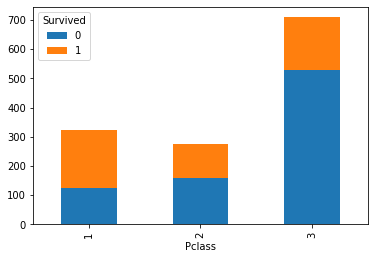

In [ ]:
data.pivot_table('PassangerId', 'Pclass', 'Survived', 'count').plot(kind='bar',
stacked=True)

Как количество родственников влияет на факт спасения

In [ ]:
import matplotlib.pyplot as plt

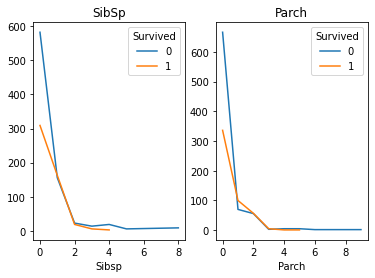

In [ ]:
fig, axes = plt.subplots(ncols=2)
data.pivot_table('PassangerId', ['Sibsp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
data.pivot_table('PassangerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

Анализ на основе поля билетов, опираясь на составление номера билета из чисел

In [ ]:
data.PassangerId[data.Ticket.str.contains('[A-Za-z]')].count()

352

Как ито, делаем вывод, что из 1310 билетов, 352 из них не состоит из чисел, а значит, это поле мы не можем использовать для анализа из-за недостатка точной информации. 

Анализируем поле Возраст

In [ ]:
data.PassangerId[data.Age.notnull()].count()

1309

Данное поле заполнено полностью. Определяем медиану значений этого поля

In [ ]:
data.Age = data.Age.median()

Аналогично рассмотрим поля Ticket, Embarked, Fare, Name. Делать это будем на основе titanic_train.csv

In [ ]:
dataS = read_csv('titanic_train.csv') 
dataS

,Unnamed: 0,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,998,999,3rd,1,"McCarthy, Miss Katie",NaN,NaN,NaN,NaN,NaN,NaN,female
1,179,180,1st,0,"Millet, Mr Francis Davis",65.0,Southampton,"East Bridgewater, MA",NaN,NaN,(249),male
2,556,557,2nd,0,"Sjostedt, Mr Ernst Adolf",59.0,Southampton,"Sault St Marie, ON",NaN,NaN,NaN,male
3,174,175,1st,0,"McCaffry, Mr Thomas Francis",46.0,Cherbourg,"Vancouver, BC",NaN,NaN,(292),male
4,1232,1233,3rd,0,"Strilic, Mr Ivan",NaN,NaN,NaN,NaN,NaN,NaN,male
...,...,...,...,...,...,...,...,...,...,...,...,...
914,455,456,2nd,1,"Ilett, Miss Bertha",17.0,Southampton,Guernsey,NaN,NaN,NaN,female
915,634,635,3rd,0,"Andreasson, Mr Paul Edvin",20.0,Southampton,"Sweden Chicago, IL",NaN,NaN,NaN,male
916,1266,1267,3rd,0,"Van Billiard, Mr Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,male
917,1246,1247,3rd,0,"Thomas, Mr Charles",NaN,NaN,NaN,NaN,NaN,NaN,male


In [ ]:
dataS[dataS.embarked.str.contains('Southampton')]

ValueError: ignored

Таких пассажиров нет, но если бы такие были, то мы бы попытались присвоить им значение самого популярного порта для посадки следующим способом:

In [ ]:
MaxPassEmbarked = dataS.groupby('embarked').count()['row.names']
dataS.embarked[dataS.embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]

Проверим поле Fare на пустые значения и если таковые имеются заменим цену медианой по цене из все выборки:

In [ ]:
data.PassangerId[data.Fare.isnull()]

Series([], Name: PassangerId, dtype: int64)

В нашем случае пустых записей нет. Удалим ненужные поля данных

In [ ]:
data = data.drop(['PassangerId','Name','Ticket'],axis=1)
data

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Unnamed: 10,Unnamed: 11
0,1,1,female,24.0,0,0,211.3375,NaN,NaN
1,1,1,male,24.0,1,2,151.55,NaN,NaN
2,0,1,female,24.0,1,2,151.55,NaN,NaN
3,0,1,male,24.0,1,2,151.55,NaN,NaN
4,0,1,female,24.0,1,2,151.55,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1304,0,3,female,24.0,1,0,14.4542,NaN,NaN
1305,0,3,female,24.0,1,0,14.4542,NaN,NaN
1306,0,3,male,24.0,0,0,7.225,NaN,NaN
1307,0,3,male,24.0,0,0,7.225,NaN,NaN


Предварительный анализ данных завершен, и по его результатам у нас получилась выборка для анализа.

**Вариант 7
 Определить количество одиноких пассажиров (без
родственников)**

Для этого нам необходимо создать отдельных столбец "Family", где будут храниться суммарные значения «Parch» и «SibSp»

In [ ]:
data['Family'] = data.Parch + data.Sibsp
data

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Unnamed: 10,Unnamed: 11,Family
0,1,1,female,24.0,0,0,211.3375,NaN,NaN,0
1,1,1,male,24.0,1,2,151.55,NaN,NaN,3
2,0,1,female,24.0,1,2,151.55,NaN,NaN,3
3,0,1,male,24.0,1,2,151.55,NaN,NaN,3
4,0,1,female,24.0,1,2,151.55,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...
1304,0,3,female,24.0,1,0,14.4542,NaN,NaN,1
1305,0,3,female,24.0,1,0,14.4542,NaN,NaN,1
1306,0,3,male,24.0,0,0,7.225,NaN,NaN,0
1307,0,3,male,24.0,0,0,7.225,NaN,NaN,0


Для того, чтобы понять количество одиноких пассажиров, достаточно определить записи, где Family=0. Для этого я вынесу их в отдельный столбец "Od" и посчитаю количество записей в нем

In [ ]:
data['Od'] = data.Family == 0
data

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Unnamed: 10,Unnamed: 11,Family,Od
0,1,1,female,24.0,0,0,211.3375,NaN,NaN,0,True
1,1,1,male,24.0,1,2,151.55,NaN,NaN,3,False
2,0,1,female,24.0,1,2,151.55,NaN,NaN,3,False
3,0,1,male,24.0,1,2,151.55,NaN,NaN,3,False
4,0,1,female,24.0,1,2,151.55,NaN,NaN,3,False
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,female,24.0,1,0,14.4542,NaN,NaN,1,False
1305,0,3,female,24.0,1,0,14.4542,NaN,NaN,1,False
1306,0,3,male,24.0,0,0,7.225,NaN,NaN,0,True
1307,0,3,male,24.0,0,0,7.225,NaN,NaN,0,True


Определяем количество True (пассажиров без семьи) с помощью *pd.Series.sum()*

In [ ]:
data['Od'].values.sum() # True

790

По данным *titanic_dataset.csv* было на борту **790** одиноких пассажиров
